# SVM（支持向量机）实验
Support Vector Machine (SVM) Experiment

## 目录
## Table of Contents
1. SVM在随机散点中的分类
   SVM Classification in Random Scatter Plot
2. SVM在环形数据集的分类
   SVM Classification in Circular Dataset
3. SVM在人脸识别中的作用
   SVM Application in Face Recognition

## 知识点
## Key Concepts
1. SVM调参、训练、可视化
   SVM Parameter Tuning, Training, and Visualization
2. 支持向量的绘制
   Drawing Support Vectors
3. 人脸识别数据库的应用
   Application of Face Recognition Database

在这个SVM实验中，我们将探索支持向量机在不同数据集上的分类性能，包括随机散点数据集、环形数据集和人脸识别。我们将学习如何调参、训练SVM模型，并对支持向量进行绘制，同时了解SVM在实际人脸识别中的应用。

In this SVM experiment, we will explore the classification performance of Support Vector Machines on various datasets, including random scatter plots, circular datasets, and face recognition. We will learn about tuning parameters, training SVM models, drawing support vectors, and understanding the application of SVM in practical face recognition tasks.

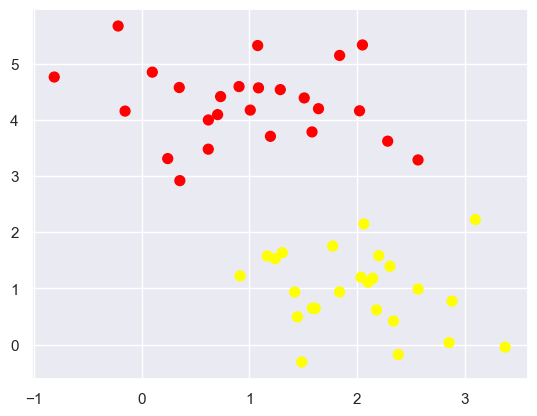

In [1]:
#导入必要的库
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
#随机生成一些数据
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, random_state =0, cluster_std = 0.7)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'autumn')

(-1.0, 3.5)

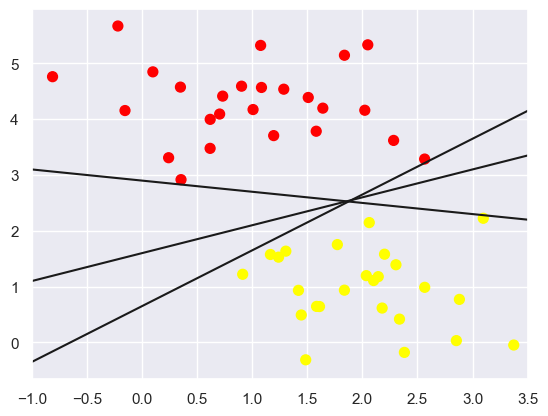

In [2]:
#随机画线，进行判断
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:,1], c = y, s = 50, cmap = 'autumn')
for m, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1,3.5)

SVC(kernel='linear')

array([[0.35482006, 2.9172298 ],
       [2.56509832, 3.28573136],
       [2.06261754, 2.14777301],
       [3.09704406, 2.22478608]])

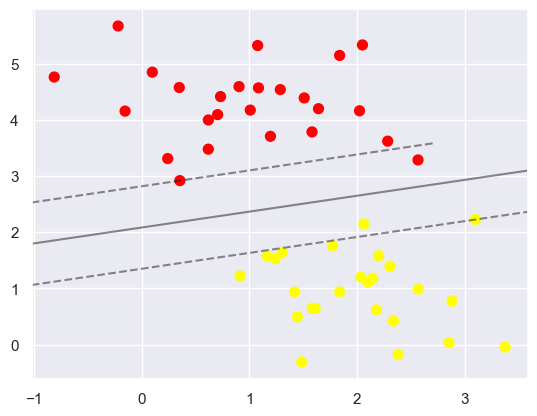

In [3]:
#向量机进行分类任务
from sklearn.svm import SVC
#线性核函数
model = SVC(kernel = 'linear')
model.fit(X, y)
#绘图
def plot_svc_decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #用SVM自带的decision function函数来绘制
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(xlim[0], xlim[1], 30)
    #利用SVM的decision_function计算分数
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    #绘制决策边际
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    #绘制支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:,1], s = 300, linewidth = 1, 
                   facecolors = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#绘制数据点、决策边界、支持向量
plt.scatter(X[:, 0], X[:,1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)
model.support_vectors_

Text(0.5, 1.0, 'N = 60')

Text(0.5, 1.0, 'N = 120')

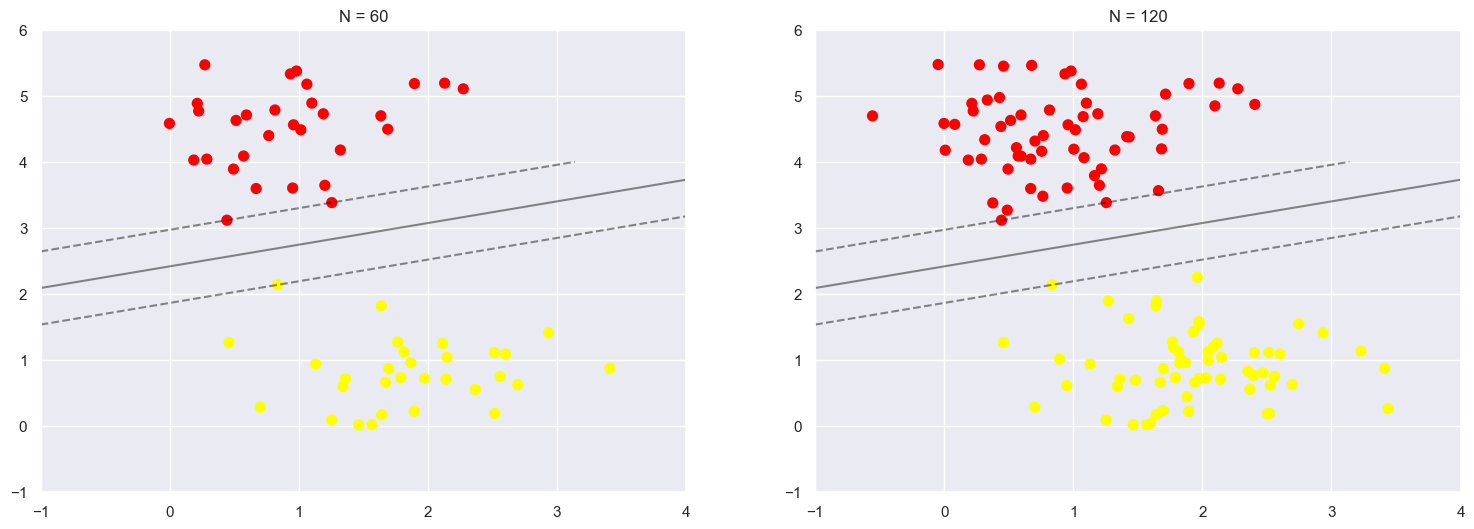

In [4]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
# 分别对不同的数据点进行绘制
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.2)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

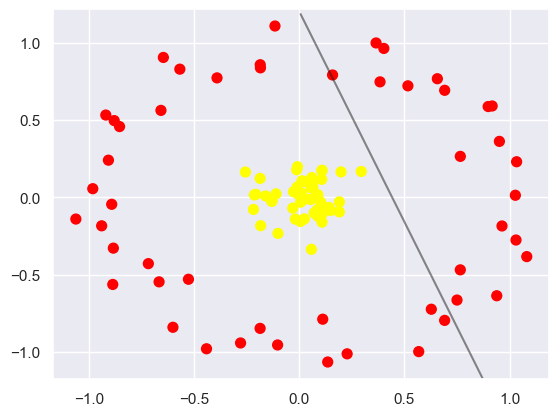

In [11]:
from sklearn.datasets import make_circles
#绘制环形数据集并用线性核函数分类
X, y = make_circles(100, factor = .1, noise = .1)
clf = SVC(kernel = 'linear').fit(X, y)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False);

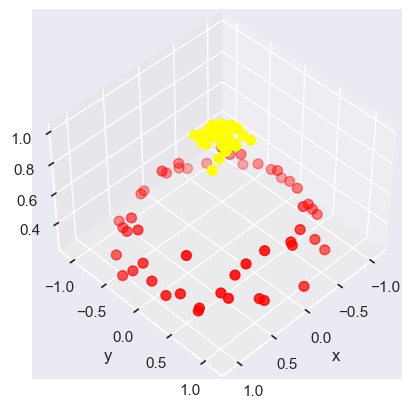

In [12]:
#加入新的维度r
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
#在三维中上下拉伸数据集
def plot_3D (elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0], X[:,1], r, c = y, s = 50, cmap = 'autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev = 45, azim = 45, X = X, y = y)

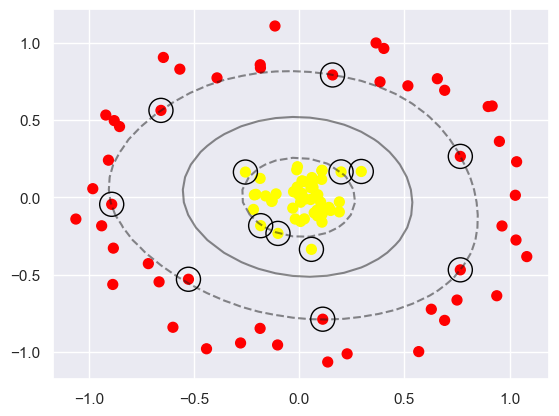

In [33]:
#使用高斯核函数
clf = SVC(kernel = 'rbf')
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none', edgecolors = 'black');

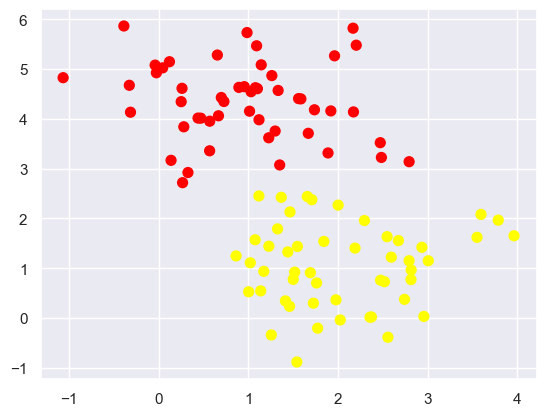

In [37]:
#松弛因子测试，设置一个新数据集
X,y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'autumn')

Text(0.5, 1.0, 'C = 10.0')

Text(0.5, 1.0, 'C = 0.1')

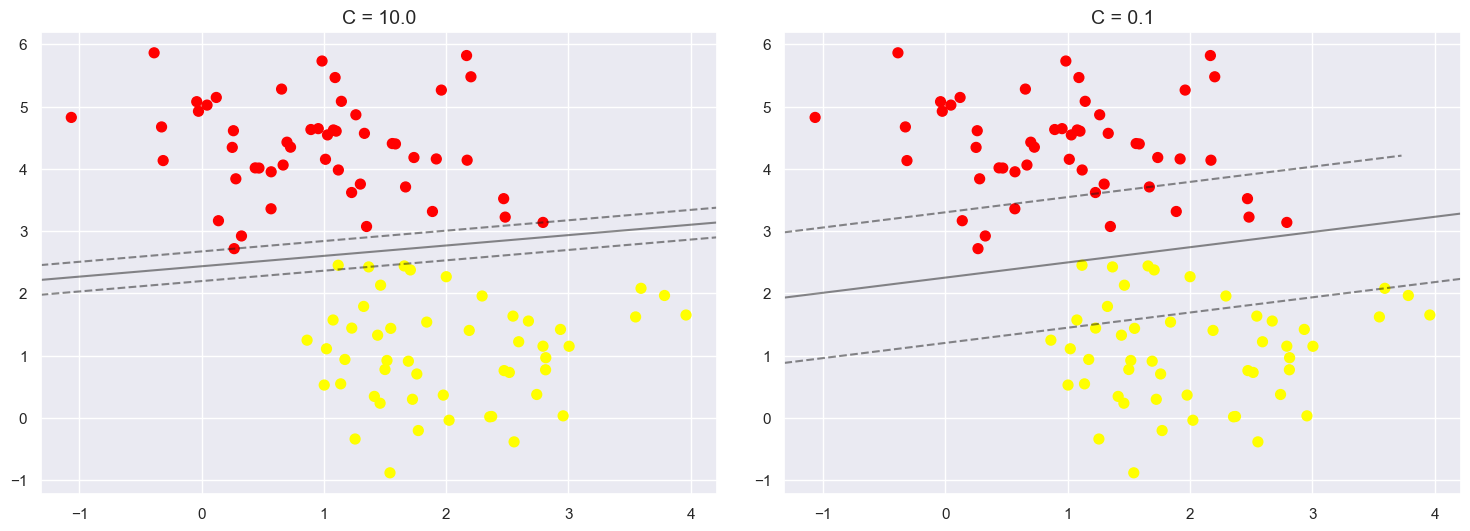

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# 选择两个C参数来进行对别实验，分别为10和0.1
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Text(0.5, 1.0, 'gamma = 10.0')

Text(0.5, 1.0, 'gamma = 0.1')

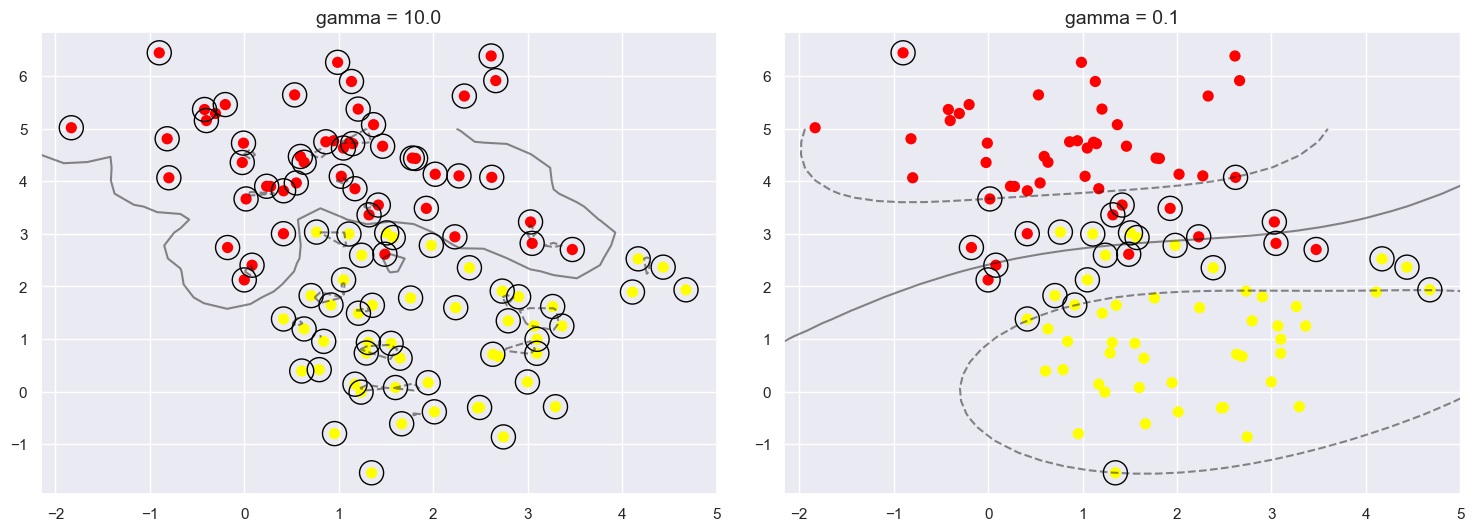

In [40]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# 高斯核函数选择不同的gamma值来观察建模效果
for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none', edgecolors = 'black');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)

In [42]:
#SVM人脸识别实例
#从sklearn导入数据
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
#查看数据规模
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [43]:
#导入相关库
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#数据将为150维
pca = PCA(n_components = 150, whiten = True, random_state = 77)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
#先降维再SVM
model = make_pipeline(pca, svc)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#划分数据集
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 77)
#模型训练
param_grid = {'svc__C': [1,5,10],
             'svc__gamma': [0.00001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print('The best params:', grid.best_params_)

CPU times: user 17min 42s, sys: 7min 56s, total: 25min 39s
Wall time: 3min 43s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=77,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10],
                         'svc__gamma': [1e-05, 0.0005, 0.001]})

The best params: {'svc__C': 1, 'svc__gamma': 0.001}


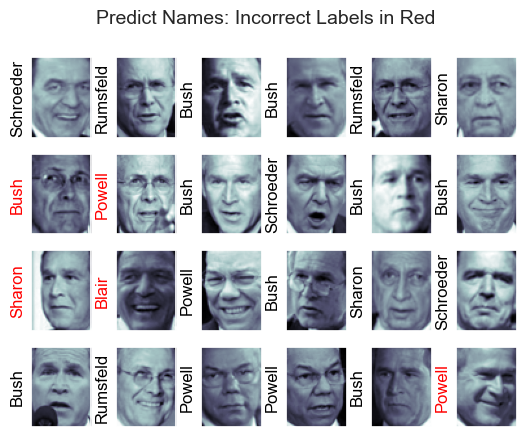

In [51]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color = 'black' if yfit[i] == ytest[i] else 'red')

fig.suptitle("Predict Names: Incorrect Labels in Red", size = 14);

                   precision    recall  f1-score   support

     Ariel Sharon       0.46      0.73      0.56        15
     Colin Powell       0.80      0.81      0.81        54
  Donald Rumsfeld       0.72      0.74      0.73        35
    George W Bush       0.93      0.81      0.86       139
Gerhard Schroeder       0.69      0.83      0.75        35
      Hugo Chavez       0.71      0.77      0.74        13
Junichiro Koizumi       1.00      0.87      0.93        15
       Tony Blair       0.75      0.77      0.76        31

         accuracy                           0.80       337
        macro avg       0.76      0.79      0.77       337
     weighted avg       0.82      0.80      0.80       337



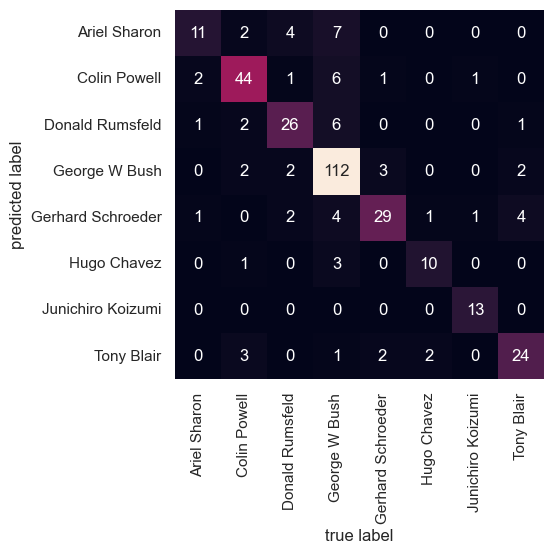

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(ytest, yfit, target_names = faces.target_names))

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');